In [1]:
# import kagglehub
# from scipy.io import loadmat
# import os
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Download latest version
# path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

# print("Path to dataset files:", path)

# # Collect all file names
# file_names = []
# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         file_names.append(os.path.join(dirname, filename))

In [2]:
import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\Administra\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = 'C:/Users/Administra/.cache/kagglehub/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/versions/1'

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))

In [5]:
# Khởi tạo danh sách để lưu trữ dữ liệu và nhãn từ tất cả các file
all_data = []
all_labels = []

# Duyệt qua tất cả các file và trích xuất dữ liệu
for file_name in file_names:
    # Tải file .mat
    mat = loadmat(file_name)

    # Trích xuất dữ liệu từ đối tượng 'o'
    mdata = mat['o']

    # Truy cập vào 'sampFreq' và 'data'
    sampFreq = mdata['sampFreq'][0][0][0][0]  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu EEG

    # Lọc dữ liệu từ các kênh 4-17 (kênh EEG)
    data_eeg = data[:, 3:17]

    # Chia dữ liệu theo các khoảng thời gian và gán nhãn
    focused_data = data_eeg[:sampFreq * 10 * 60, :]  # 10 phút đầu tiên (tập trung)
    unfocused_data = data_eeg[sampFreq * 10 * 60:sampFreq * 20 * 60, :]  # 10 phút tiếp theo (mất tập trung)
    drowsy_data = data_eeg[sampFreq * 30 * 60:, :]  # Từ 20 phút trở đi (buồn ngủ)

    # Thêm dữ liệu và nhãn vào danh sách
    all_data.append(focused_data)
    all_labels.append(np.full((focused_data.shape[0],), 'focused'))

    all_data.append(unfocused_data)
    all_labels.append(np.full((unfocused_data.shape[0],), 'unfocused'))

    all_data.append(drowsy_data)
    all_labels.append(np.full((drowsy_data.shape[0],), 'drowsy'))

In [6]:
# Kết hợp tất cả dữ liệu và nhãn từ các file
combined_data = np.concatenate(all_data, axis=0)
combined_labels = np.concatenate(all_labels, axis=0)

In [7]:
# Chuyển đổi dữ liệu thành DataFrame và gán nhãn
columns = [f'Channel_{i}' for i in range(4, 18)]
df = pd.DataFrame(combined_data, columns=columns)
df['Label'] = combined_labels

# Đổi tên các cột cho phù hợp với tên kênh EEG
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
rename_map = {f'Channel_{i}': name for i, name in zip(range(4, 18), channel_names)}
df.rename(columns=rename_map, inplace=True)

In [8]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Label
0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615,4563.589744,focused
1,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872,4566.666667,focused
2,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154,4557.948718,focused
3,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974,4552.820513,focused
4,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974,4546.666667,focused


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19834424 entries, 0 to 19834423
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   AF3     float64
 1   F7      float64
 2   F3      float64
 3   FC5     float64
 4   T7      float64
 5   P7      float64
 6   O1      float64
 7   O2      float64
 8   P8      float64
 9   T8      float64
 10  FC6     float64
 11  F4      float64
 12  F8      float64
 13  AF4     float64
 14  Label   object 
dtypes: float64(14), object(1)
memory usage: 2.2+ GB


In [10]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07,1.983442e+07
mean,4.438269e+03,3.978537e+03,5.046021e+03,3.827907e+03,4.039207e+03,4.317726e+03,4.285595e+03,4.028547e+03,4.165095e+03,4.308555e+03,4.142313e+03,4.282479e+03,4.334318e+03,4.130386e+03
std,1.535883e+01,5.745537e+01,8.645828e+01,4.687675e+00,1.856880e+01,9.367047e+01,8.202349e+01,6.770485e+01,6.234927e+01,1.272917e+01,9.874875e+00,1.480289e+01,2.869732e+00,6.593421e+01
min,4.764103e+02,3.066667e+02,0.000000e+00,8.738462e+02,2.328205e+02,3.158974e+02,2.758974e+02,2.774359e+02,2.507692e+02,3.717949e+03,2.460513e+03,1.332308e+03,2.595897e+03,3.010256e+02
25%,4.436410e+03,3.962051e+03,5.030256e+03,3.826154e+03,4.036410e+03,4.301026e+03,4.266667e+03,4.011282e+03,4.149744e+03,4.304615e+03,4.139487e+03,4.282564e+03,4.333846e+03,4.115385e+03
50%,4.438462e+03,3.978974e+03,5.048718e+03,3.828205e+03,4.042051e+03,4.318974e+03,4.287692e+03,4.029744e+03,4.167179e+03,4.307692e+03,4.142564e+03,4.283077e+03,4.334872e+03,4.132308e+03
75%,4.441026e+03,3.995385e+03,5.064103e+03,3.829744e+03,4.045128e+03,4.334872e+03,4.308205e+03,4.048205e+03,4.184615e+03,4.309231e+03,4.144615e+03,4.286667e+03,4.335385e+03,4.148718e+03
max,7.060513e+03,7.808205e+03,8.401538e+03,5.400000e+03,4.515385e+03,7.948205e+03,7.921538e+03,7.844615e+03,8.022564e+03,4.586154e+03,4.870256e+03,5.477436e+03,4.622564e+03,8.122564e+03


# Preprocess

## Lọc băng thông + xử lí nhiễu

In [13]:
from scipy.signal import butter, filtfilt, iirnotch

# Hàm tạo bộ lọc thông cao và thông thấp
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Hàm tạo bộ lọc notch
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, data, axis=0)

# Lọc thông cao và thông thấp
lowcut = 0.5  # Hz
highcut = 30  # Hz
fs = sampFreq  # Tần số lấy mẫu

filtered_data = bandpass_filter(df[channel_names].values, lowcut, highcut, fs)

# Lọc notch để loại bỏ nhiễu 50 Hz
notch_freq = 50  # Hz
filtered_data = notch_filter(filtered_data, notch_freq, fs)

# Chuyển dữ liệu đã lọc sang DataFrame để dễ quản lý
filtered_df = pd.DataFrame(filtered_data, columns=channel_names)
filtered_df['Label'] = df['Label'].values

Dữ liệu từ file C:/Users/Administra/.cache/kagglehub/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/versions/1\EEG Data\eeg_record1.mat: (308868, 25)


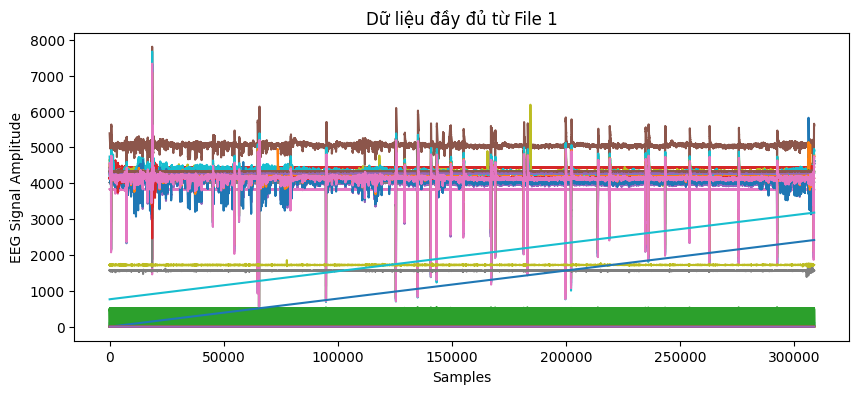


Dữ liệu EEG từ các kênh 4-17: (308868, 14)


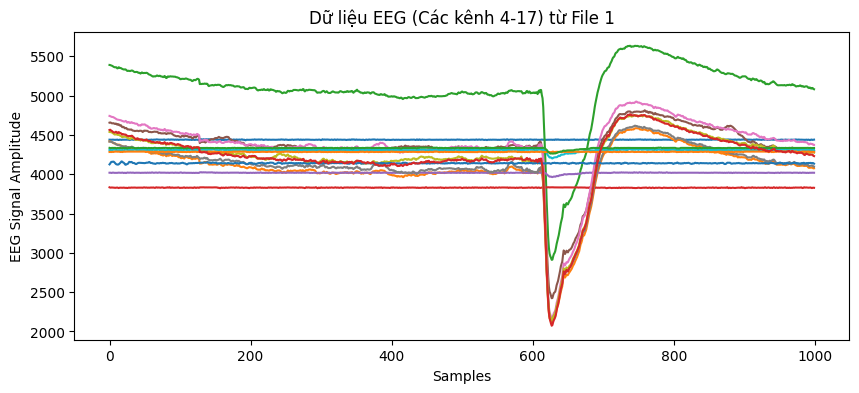

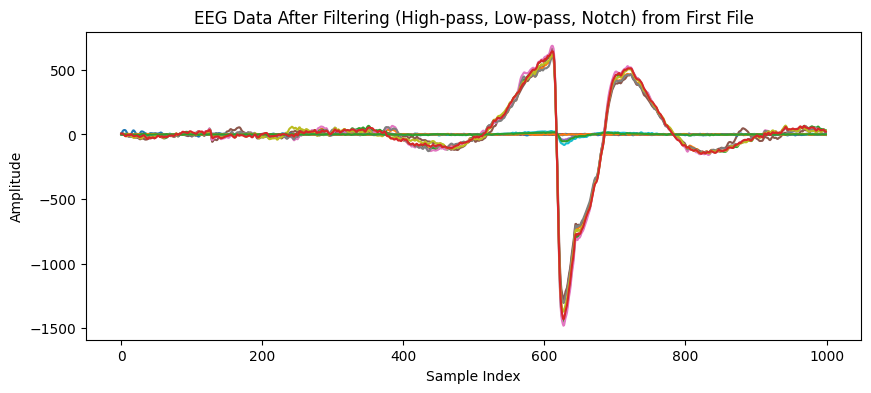

In [14]:
# Phân tích dữ liệu từ file đầu tiên
for i in range(1):
    record = loadmat(file_names[i])
    mdata = record['o']  # Đối tượng chính
    sample1 = {n: mdata[n][0, 0] for n in mdata.dtype.names}

    data = sample1['data']
    trials = sample1['trials']

    print('Dữ liệu từ file {}:'.format(file_names[i]), data.shape)
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')
    plt.xlabel('Samples')
    plt.ylabel('EEG Signal Amplitude')
    plt.show()

    data_eeg = data[:, 3:17]
    print('\nDữ liệu EEG từ các kênh 4-17:', data_eeg.shape)
    plt.figure(figsize=(10, 4))
    plt.plot(data_eeg[:1000,:])
    plt.title(f'Dữ liệu EEG (Các kênh 4-17) từ File {i + 1}')
    plt.xlabel('Samples')
    plt.ylabel('EEG Signal Amplitude')
    plt.show()

    # Lọc thông cao và thông thấp
    lowcut = 0.5  # Hz
    highcut = 30  # Hz
    sampFreq = mdata['sampFreq'][0][0][0][0]  # Tần số lấy mẫu
    filtered_data_1 = bandpass_filter(data_eeg, lowcut, highcut, sampFreq)

    # Lọc notch để loại bỏ nhiễu 50 Hz
    notch_freq = 50  # Hz
    filtered_data_1 = notch_filter(filtered_data_1, notch_freq, sampFreq)

    # Chuyển dữ liệu đã lọc sang DataFrame để dễ quản lý
    channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    filtered_df_1 = pd.DataFrame(filtered_data_1, columns=channel_names)

    # Biểu diễn tín hiệu sau khi lọc của file đầu tiên
    plt.figure(figsize=(10, 4))
    plt.plot(filtered_df[channel_names].iloc[:1000])  
    plt.title('EEG Data After Filtering (High-pass, Low-pass, Notch) from First File')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()


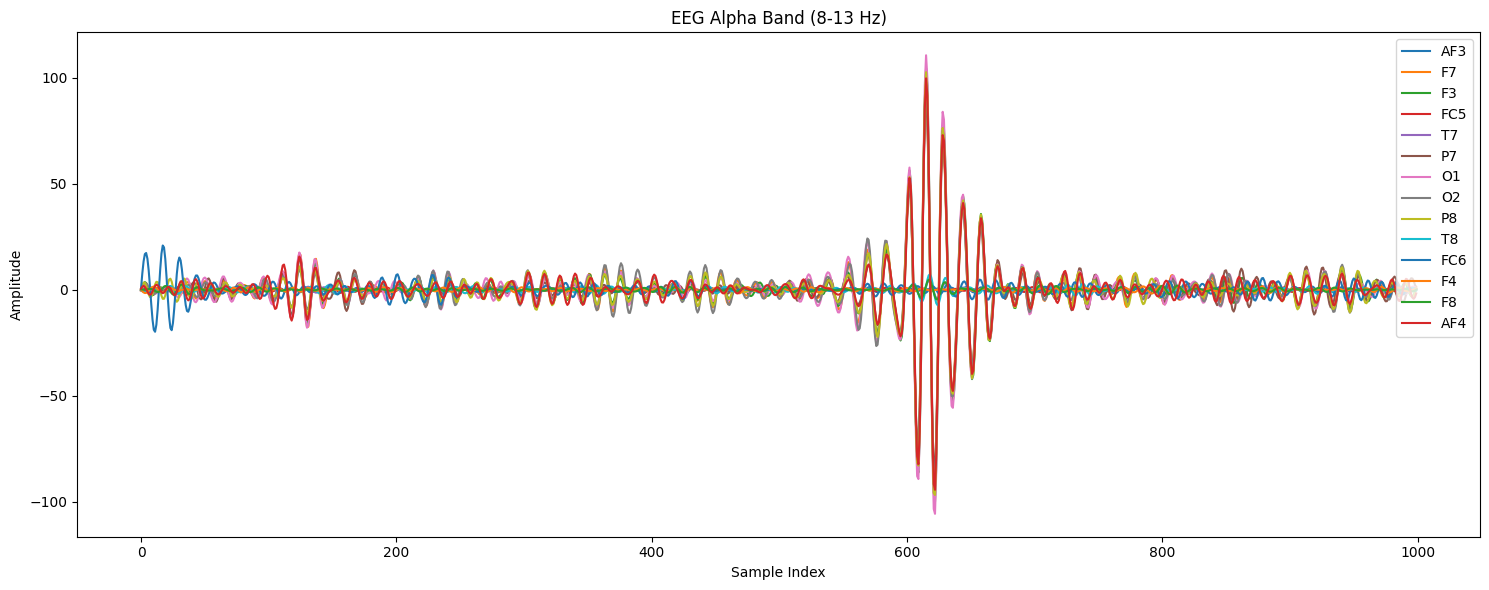

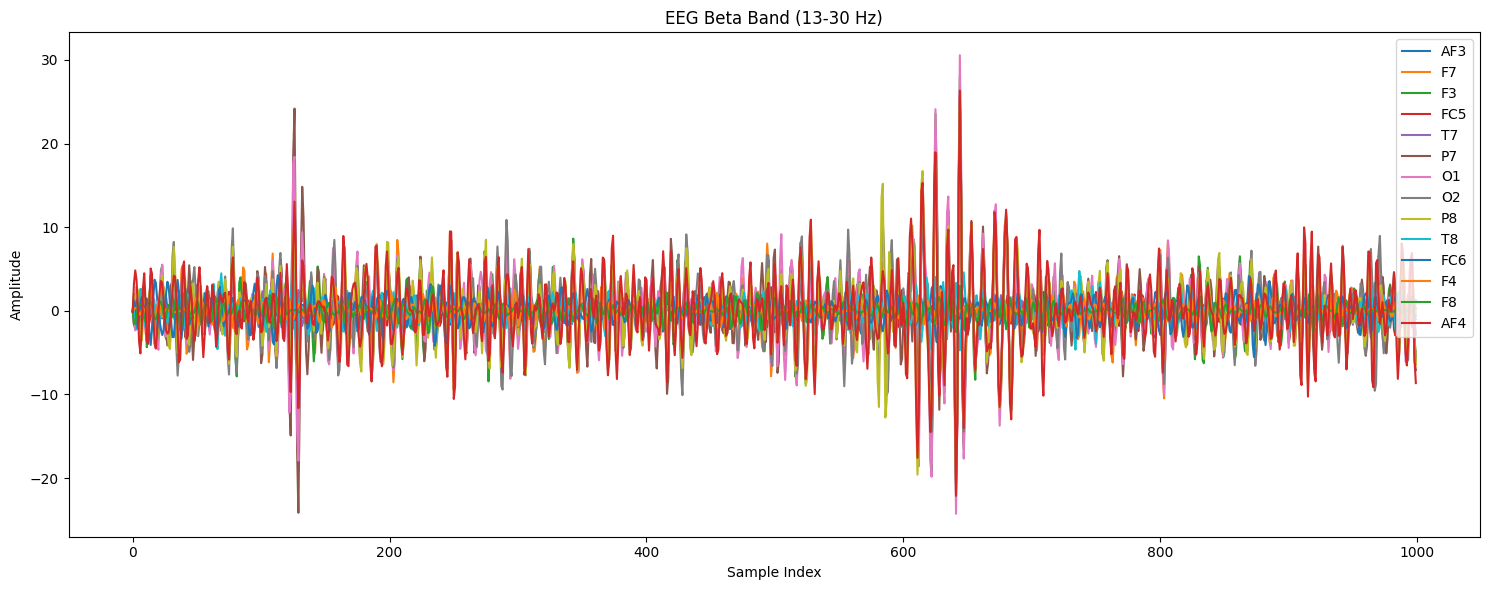

In [16]:
# Lọc thông dải để giữ lại dải alpha (8-13 Hz) hoặc beta (13-30 Hz)
alpha_low = 8  # Hz
alpha_high = 13  # Hz
beta_low = 13  # Hz
beta_high = 30  # Hz

alpha_band = bandpass_filter(filtered_df[channel_names].values, alpha_low, alpha_high, fs)
beta_band = bandpass_filter(filtered_df[channel_names].values, beta_low, beta_high, fs)

# Biểu diễn tín hiệu dải alpha
plt.figure(figsize=(15, 6))
plt.plot(alpha_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Alpha Band (8-13 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(channel_names, loc='upper right')
plt.tight_layout()
plt.show()

# Biểu diễn tín hiệu dải beta
plt.figure(figsize=(15, 6))
plt.plot(beta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Beta Band (13-30 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(channel_names, loc='upper right')
plt.tight_layout()
plt.show()

# ICA